In [1]:
import pandas as pd
pd.options.mode.chained_assignment= None
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import requests
import talib as talib
import yfinance as yf
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')

In [8]:
tickers[1]

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS.NS,Infrastructure
1,Asian Paints,ASIANPAINT.NS,Consumer Goods
2,Axis Bank,AXISBANK.NS,Banking
3,Bajaj Auto,BAJAJ-AUTO.NS,Automobile
4,Bajaj Finance,BAJFINANCE.NS,Financial Services
5,Bajaj Finserv,BAJAJFINSV.NS,Financial Services
6,Bharti Airtel,BHARTIARTL.NS,Telecommunication
7,Bharat Petroleum,BPCL.NS,Energy - Oil & Gas
8,Britannia Industries,BRITANNIA.NS,Consumer Goods
9,Cipla,CIPLA.NS,Pharmaceuticals


In [10]:
#tickers.Symbols.to_list()
tickers = tickers[1].Symbol.to_list() 

In [11]:
tickers

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TATACONSUM.NS',
 'TCS.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS']

In [39]:
# stocks symbol for asset
def RSIcalc(asset):
    df =yf.download(asset,start='2013-01-01',end='2018-01-01') # small error
    df['MA50'] = df['Adj Close'].rolling(window=50).mean()
    #pct_change for percentage change
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(3).mean()
    df['avg Down'] = df['Downmove'].ewm(3).mean()
    df = df.dropna()
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df['BUY'] = None
    for i in range(2,len(df)):
        if (df['Adj Close'][i] > df['MA50'][i]) and (df['RSI'][i] < 30) :
            df['BUY'][i] = 'YES'
        elif (df['Adj Close'][i] < df['MA50'][i]) and (df['RSI'][i] > 30) :
            df['BUY'][i] = 'NO'
            # changed
    return df
#loc[] method is a method that takes only index labels and returns row or dataframe if the index label exists in the caller data frame.

In [40]:
# error statements  
#df.loc[(df['Adj Close'] > df['MA50'])] and (df['RSI'] < 30, 'BUY') = 'YES'
#df.loc[(df['Adj Close'] < df['MA50'])] and (df['RSI'] > 30, 'BUY') = 'NO'    
    

In [51]:
#.name is used for getting the name of the row which is the date
#append is used to add an item to a list
#i+1,i+j+1 is taken because we want to buy/sell on next day
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    for i in range(2,len(df)-1):
        if df['BUY'][i] == 'YES':
            Buying_dates.append(df.index[i+1])
            for j in range(1,16):
                if df['RSI'].iloc[i+j]>50:
                    Selling_dates.append(df.index[i+j+1])
                    break
                elif df['RSI'].iloc[i+j]==15:
                    Selling_dates.append(df.index[i+j+1])

    return Buying_dates,Selling_dates 

In [52]:
frame = RSIcalc(tickers[5])
buy,sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


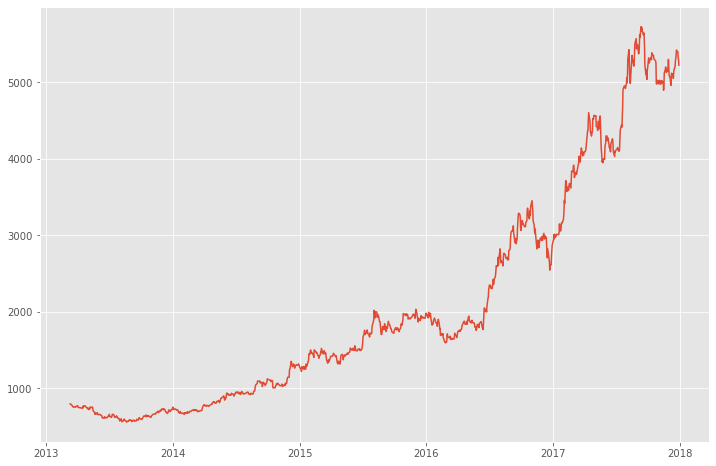

In [59]:
plt.figure(figsize=(12,8))
#plt.scatter(frame.loc[buy].index, marker='^', c='g')
plt.plot(frame['Adj Close'])

In [57]:
frame

,Open,High,Low,Close,Adj Close,Volume,MA50,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,BUY
Date,,,,,,,,,,,,,,,
2013-03-11,817.700012,818.299988,803.000000,804.700012,798.425232,23872,836.037629,-0.006972,0.000000,0.006972,0.002846,0.004379,0.649867,39.389047,None
2013-03-12,806.200012,814.849976,800.849976,801.650024,795.398987,41566,833.854783,-0.003790,0.000000,0.003790,0.002134,0.004232,0.504359,33.526518,None
2013-03-13,803.250000,803.549988,796.400024,797.049988,790.834900,37145,831.607444,-0.005738,0.000000,0.005738,0.001601,0.004609,0.347365,25.781046,None
2013-03-14,799.849976,800.849976,791.900024,795.450012,789.247375,53026,829.237073,-0.002007,0.000000,0.002007,0.001201,0.003958,0.303324,23.273100,None
2013-03-15,801.349976,801.400024,792.000000,795.099976,788.900024,26403,826.548203,-0.000440,0.000000,0.000440,0.000900,0.003079,0.292484,22.629592,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,5316.000000,5444.899902,5316.000000,5428.149902,5421.761230,116452,5126.055527,0.013973,0.013973,0.000000,0.009437,0.000709,13.311148,93.012440,None
2017-12-26,5431.899902,5435.000000,5355.000000,5403.549805,5397.189941,59737,5126.620869,-0.004532,0.000000,0.004532,0.007078,0.001665,4.251650,80.958365,None
2017-12-27,5411.000000,5418.799805,5280.799805,5326.299805,5320.031250,78924,5126.061543,-0.014296,0.000000,0.014296,0.005308,0.004823,1.100729,52.397484,None


In [54]:
PnL = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [55]:
PnL

array([ 0.00441231,  0.00574713,  0.01744186,  0.0187746 ,  0.03550296,
        0.03703704, -0.01544835, -0.00855606,  0.04801423,  0.01828728,
        0.04008776,  0.00174189,  0.02042498,  0.03515996,  0.05177805,
        0.05199183,  0.05939933,  0.00559429,  0.01466954,  0.01382166,
        0.03707401, -0.0071252 ,  0.03193377,  0.00867052, -0.03991918,
       -0.03056019, -0.02429793,  0.00621762,  0.03050185,  0.00674687,
        0.0082282 ,  0.00897537,  0.01810728,  0.0411386 , -0.096367  ,
       -0.07120253,  0.01377926,  0.02013119,  0.025     ,  0.025     ,
       -0.0437171 , -0.01692985,  0.02256214])

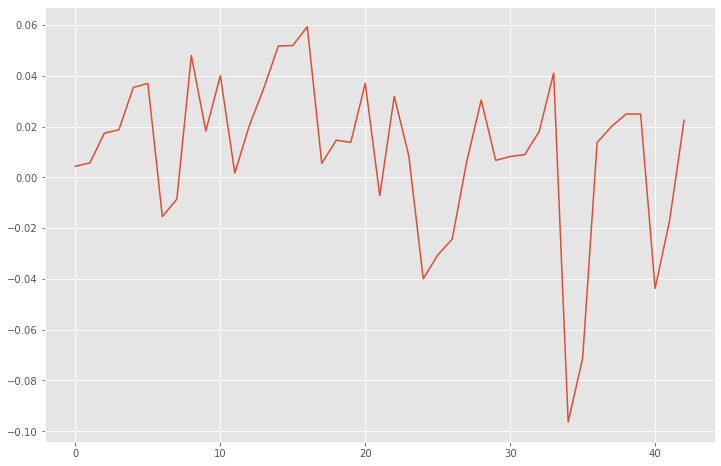

In [56]:
plt.figure(figsize=(12,8))
plt.plot(PnL)